## Classification tree

We will try to predict if the movie will win a start-tech oscar or not (the categorical variable)

In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Movie_classification.csv", header = 0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Preprocessing

In [9]:
#missing value imputation
df["Time_taken"] = df["Time_taken"].fillna(np.mean(df.Time_taken))
#or
#df["Time_taken"].fillna(value = df["Time_taken"].mean(), inplace = True)

In [10]:
df["Time_taken"]

0      109.60
1      146.64
2      147.88
3      185.36
4      176.48
        ...  
501    186.96
502    132.24
503    109.56
504    158.80
505    205.60
Name: Time_taken, Length: 506, dtype: float64

In [11]:
#dummy variable creation
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [13]:
df = pd.get_dummies(df, columns = ["3D_available", "Genre"], drop_first = True)

In [14]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


### X-y split

In [15]:
X = df.loc[:, df.columns!="Start_Tech_Oscar"]
y = df["Start_Tech_Oscar"]

In [16]:
print(X.shape, y.shape)

(506, 20) (506,)


In [17]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [19]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

### Test-train split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 20) (102, 20) (404,) (102,)


### Training classification tree

In [24]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3) #create object classifier with the estimator model
clftree.fit(X_train, y_train) #fit the model in training data

DecisionTreeClassifier(max_depth=3)

In [25]:
#get probabilities
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [26]:
y_test_pred #inspect predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

### Evaluate model performance

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [29]:
confusion_matrix(y_train, y_train_pred) #confusion matrix for train
#REMEMBER for 0 as negative reference
#[true negatives, false positives]
#[false negatives, true positives]

array([[172,  14],
       [126,  92]], dtype=int64)

In [38]:
cm = confusion_matrix(y_test, y_test_pred, labels = clftree.classes_) #confusion matrix for test
cm

array([[39,  5],
       [41, 17]], dtype=int64)

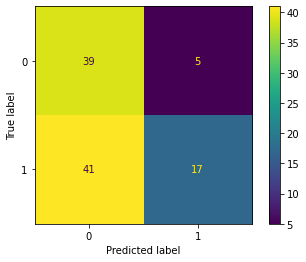

In [37]:
disp = ConfusionMatrixDisplay(cm, display_labels = clftree.classes_)
disp.plot()

In [31]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

### Plotting classification tree

[Text(697.5, 951.3000000000001, 'Budget <= 30694.152\ngini = 0.497\nsamples = 404\nvalue = [186, 218]\nclass = t'),
 Text(348.75, 679.5, 'Marketing expense <= 24.613\ngini = 0.157\nsamples = 35\nvalue = [3, 32]\nclass = t'),
 Text(174.375, 407.70000000000005, 'Time_taken <= 151.66\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = S'),
 Text(87.1875, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = t'),
 Text(261.5625, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = S'),
 Text(523.125, 407.70000000000005, 'Producer_rating <= 9.552\ngini = 0.061\nsamples = 32\nvalue = [1, 31]\nclass = t'),
 Text(435.9375, 135.89999999999998, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]\nclass = t'),
 Text(610.3125, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = S'),
 Text(1046.25, 679.5, 'Collection <= 63100.0\ngini = 0.5\nsamples = 369\nvalue = [183, 186]\nclass = t'),
 Text(871.875, 407.70000000000005, 'Producer_rating <= 6.105\ngini = 0

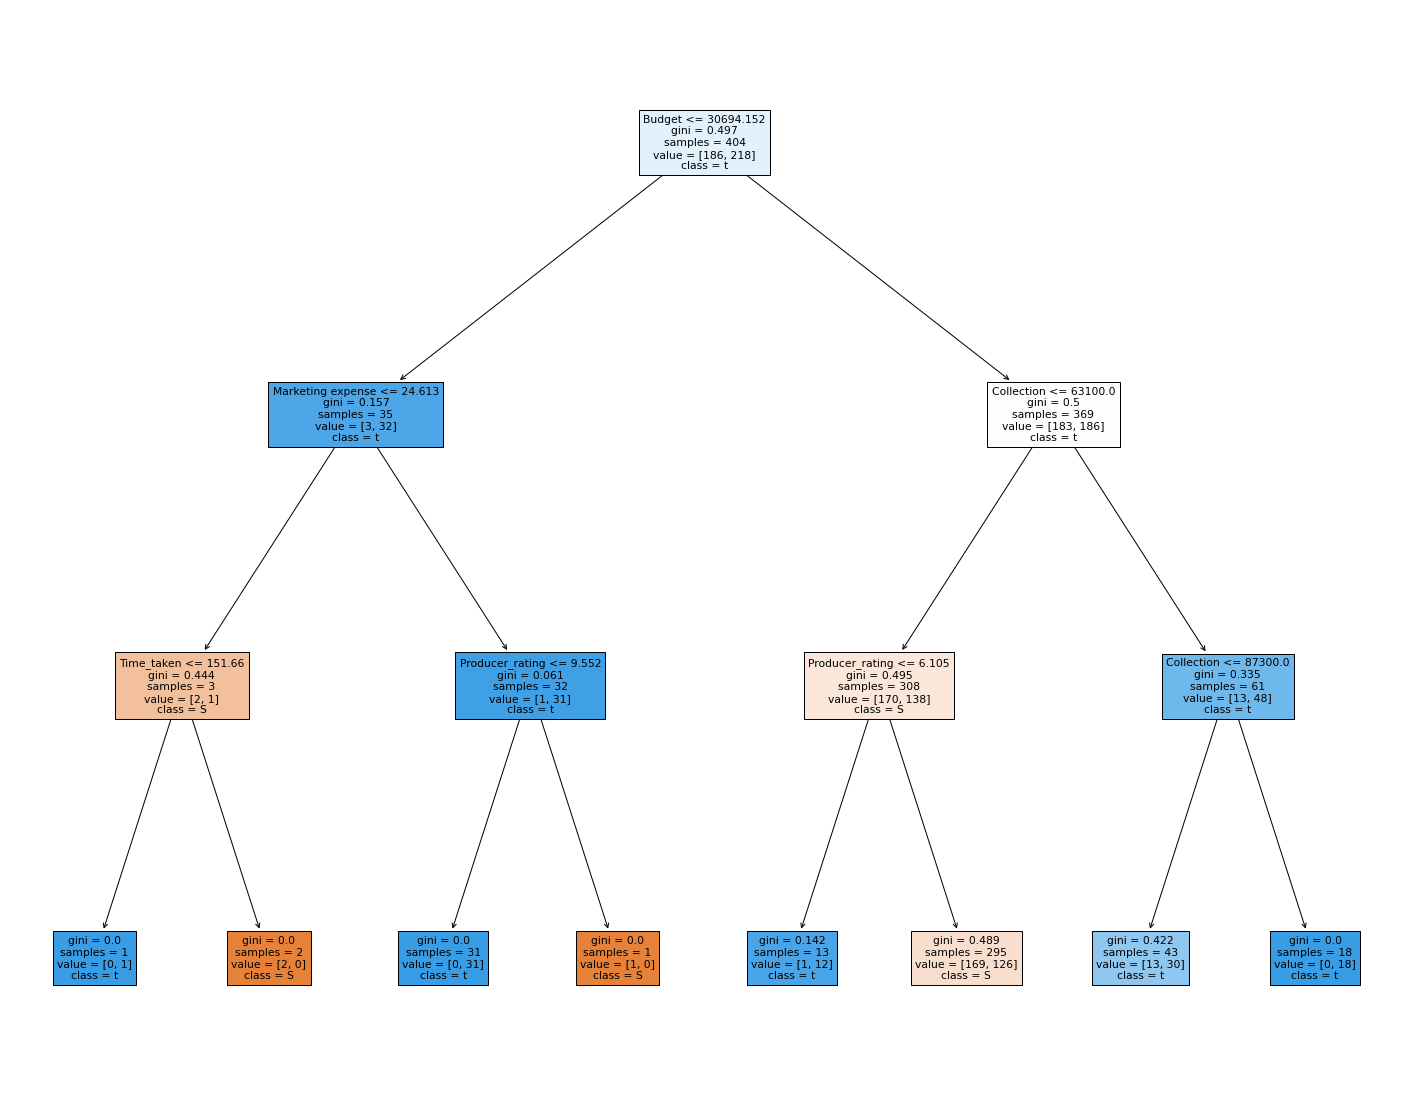

In [39]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clftree, 
               feature_names = X_train.columns,
               class_names= y_train.name,
               filled=True)

### Controlling tree growth

In [40]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 4) #set min samples in leaf/terminal nodes to 20, and max depth of tree to 4
clftree2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

[Text(620.0, 978.48, 'Budget <= 30694.152\ngini = 0.497\nsamples = 404\nvalue = [186, 218]\nclass = y[1]'),
 Text(465.0, 761.0400000000001, 'gini = 0.157\nsamples = 35\nvalue = [3, 32]\nclass = y[1]'),
 Text(775.0, 761.0400000000001, 'Collection <= 63100.0\ngini = 0.5\nsamples = 369\nvalue = [183, 186]\nclass = y[1]'),
 Text(465.0, 543.6, 'Time_taken <= 194.08\ngini = 0.495\nsamples = 308\nvalue = [170, 138]\nclass = y[0]'),
 Text(310.0, 326.1600000000001, 'Budget <= 37146.285\ngini = 0.499\nsamples = 270\nvalue = [141, 129]\nclass = y[0]'),
 Text(155.0, 108.72000000000003, 'gini = 0.5\nsamples = 233\nvalue = [114, 119]\nclass = y[1]'),
 Text(465.0, 108.72000000000003, 'gini = 0.394\nsamples = 37\nvalue = [27, 10]\nclass = y[0]'),
 Text(620.0, 326.1600000000001, 'gini = 0.361\nsamples = 38\nvalue = [29, 9]\nclass = y[0]'),
 Text(1085.0, 543.6, 'Collection <= 84000.0\ngini = 0.335\nsamples = 61\nvalue = [13, 48]\nclass = y[1]'),
 Text(930.0, 326.1600000000001, 'Producer_rating <= 7.88\n

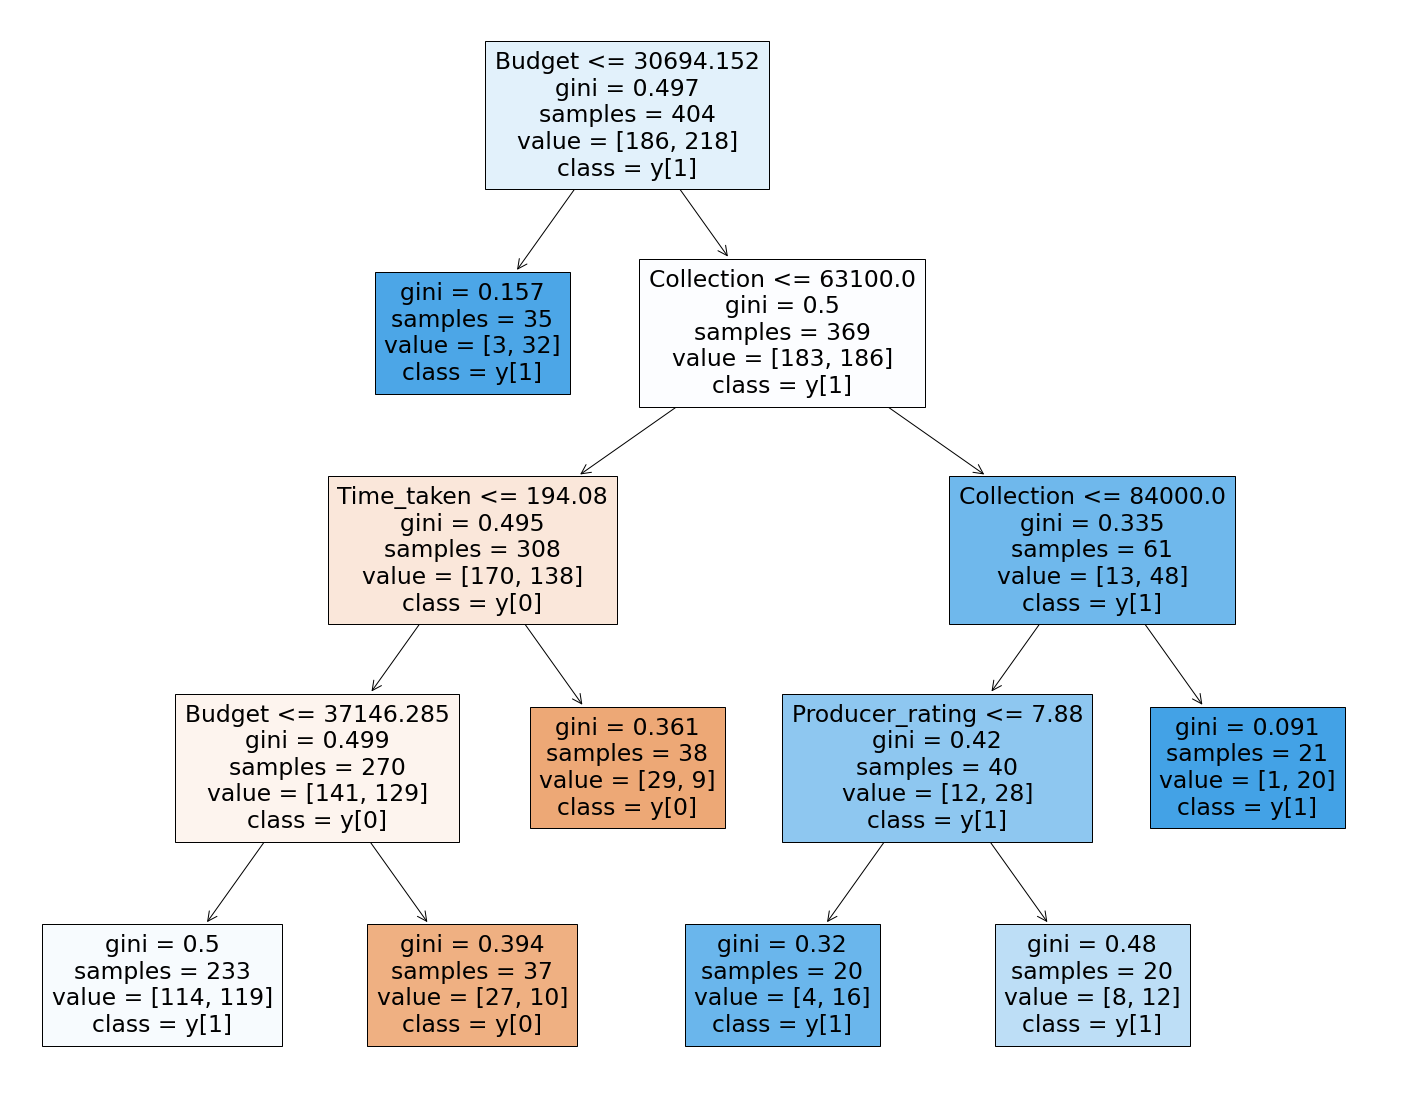

In [46]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clftree2, 
               feature_names = X_train.columns,
               class_names = True,
               filled=True)

In [47]:
accuracy_score(y_test, clftree2.predict(X_test))

0.5588235294117647

In [48]:
# Finding the best alpha_ccp parameter
from sklearn.model_selection import GridSearchCV

In [52]:
params = {"ccp_alpha": np.linspace(0, 0.05, num = 25, dtype = float)}
params

{'ccp_alpha': array([0.        , 0.00208333, 0.00416667, 0.00625   , 0.00833333,
        0.01041667, 0.0125    , 0.01458333, 0.01666667, 0.01875   ,
        0.02083333, 0.02291667, 0.025     , 0.02708333, 0.02916667,
        0.03125   , 0.03333333, 0.03541667, 0.0375    , 0.03958333,
        0.04166667, 0.04375   , 0.04583333, 0.04791667, 0.05      ])}

In [53]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=params)
grid_search_cv

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00208333, 0.00416667, 0.00625   , 0.00833333,
       0.01041667, 0.0125    , 0.01458333, 0.01666667, 0.01875   ,
       0.02083333, 0.02291667, 0.025     , 0.02708333, 0.02916667,
       0.03125   , 0.03333333, 0.03541667, 0.0375    , 0.03958333,
       0.04166667, 0.04375   , 0.04583333, 0.04791667, 0.05      ])})

In [54]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00208333, 0.00416667, 0.00625   , 0.00833333,
       0.01041667, 0.0125    , 0.01458333, 0.01666667, 0.01875   ,
       0.02083333, 0.02291667, 0.025     , 0.02708333, 0.02916667,
       0.03125   , 0.03333333, 0.03541667, 0.0375    , 0.03958333,
       0.04166667, 0.04375   , 0.04583333, 0.04791667, 0.05      ])})

In [55]:
pd.DataFrame(grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005185,0.000398,0.001596,0.000488,0.0,{'ccp_alpha': 0.0},0.641975,0.543210,0.555556,0.555556,0.5375,0.566759,0.038260,7
1,0.006580,0.002332,0.001806,0.001161,0.002083,{'ccp_alpha': 0.0020833333333333333},0.641975,0.493827,0.580247,0.506173,0.5125,0.546944,0.056232,10
2,0.003391,0.001739,0.001356,0.000771,0.004167,{'ccp_alpha': 0.004166666666666667},0.617284,0.567901,0.543210,0.506173,0.5000,0.546914,0.043051,11
3,0.006253,0.007658,0.000000,0.000000,0.00625,{'ccp_alpha': 0.00625},0.592593,0.580247,0.604938,0.555556,0.5500,0.576667,0.021083,3
4,0.003124,0.006248,0.003124,0.006248,0.008333,{'ccp_alpha': 0.008333333333333333},0.580247,0.555556,0.580247,0.641975,0.5750,0.586605,0.029139,2
5,0.003124,0.006249,0.000000,0.000000,0.010417,{'ccp_alpha': 0.010416666666666666},0.641975,0.604938,0.592593,0.654321,0.5625,0.611265,0.033358,1
6,0.006248,0.007653,0.000000,0.000000,0.0125,{'ccp_alpha': 0.0125},0.641975,0.481481,0.617284,0.580247,0.5500,0.574198,0.055980,4
7,0.006249,0.007653,0.000000,0.000000,0.014583,{'ccp_alpha': 0.014583333333333334},0.654321,0.444444,0.617284,0.580247,0.5500,0.569259,0.071571,6
8,0.005073,0.005621,0.003930,0.005881,0.016667,{'ccp_alpha': 0.016666666666666666},0.592593,0.444444,0.617284,0.580247,0.5625,0.559414,0.060185,8
9,0.005396,0.005497,0.000399,0.000488,0.01875,{'ccp_alpha': 0.01875},0.567901,0.543210,0.543210,0.580247,0.5625,0.559414,0.014427,8


In [56]:
grid_search_cv.best_params_

{'ccp_alpha': 0.010416666666666666}

In [57]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.010416666666666666)

In [58]:
optimized_ccp = grid_search_cv.best_estimator_

In [59]:
type(optimized_ccp)

sklearn.tree._classes.DecisionTreeClassifier

In [63]:
y_test_pred_opt = optimized_ccp.predict(X_test)
y_test_pred_opt

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [64]:
accuracy_score(y_test, y_test_pred_opt) #compute accuracy score, note how it increases with optimized ccp parameter

0.6764705882352942

In [67]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.00518479, 0.00657964, 0.00339069, 0.00625257, 0.00312424,
        0.00312438, 0.00624838, 0.00624852, 0.00507312, 0.00539632,
        0.00312428, 0.00477142, 0.00412831, 0.00624943, 0.00312424,
        0.00312428, 0.00312519, 0.00782695, 0.00549593, 0.00419092,
        0.00352621, 0.00624838, 0.00624857, 0.00624847, 0.00312433]),
 'std_fit_time': array([0.00039809, 0.00233155, 0.00173859, 0.00765781, 0.00624847,
        0.00624876, 0.00765267, 0.00765285, 0.00562118, 0.00549655,
        0.00624857, 0.00386635, 0.00607842, 0.00765395, 0.00624847,
        0.00624857, 0.00625038, 0.00584831, 0.00664441, 0.00040257,
        0.00611294, 0.00765267, 0.0076529 , 0.00765279, 0.00624866]),
 'mean_score_time': array([1.59635544e-03, 1.80587769e-03, 1.35617256e-03, 0.00000000e+00,
        3.12414169e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.92951965e-03, 3.98588181e-04, 3.12418938e-03, 1.19018555e-03,
        9.01699066e-05, 0.00000000e+00, 3.123378